# 1.Linear

In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


In [3]:
# Load dataset 
df = pd.read_csv('power.csv')

# Display first few rows
print(df.head())


      AT      V       AP     RH      PE
0   8.34  40.77  1010.84  90.01  480.48
1  23.64  58.49  1011.40  74.20  445.75
2  29.74  56.90  1007.15  41.91  438.76
3  19.07  49.69  1007.22  76.79  453.09
4  11.80  40.66  1017.13  97.20  464.43


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


In [5]:
# Get the description of the dataset
description = df.describe()
print(description)

                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


In [6]:
# Shows a tuple with row and column size
df.shape 

(9568, 5)

In [7]:
# Display information about the dataframe, including the index dtype and column dtypes, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [8]:
# Returns the first few rows of the DataFrame df
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Three Interseting Insights from dataset

### 1. Relationship Between Atmospheric Pressure (AP) and Relative Humidity (RH)
Atmospheric pressure (AP) might be inversely related to relative humidity (RH). Higher atmospheric pressure could indicate dry air, resulting in lower humidity levels.

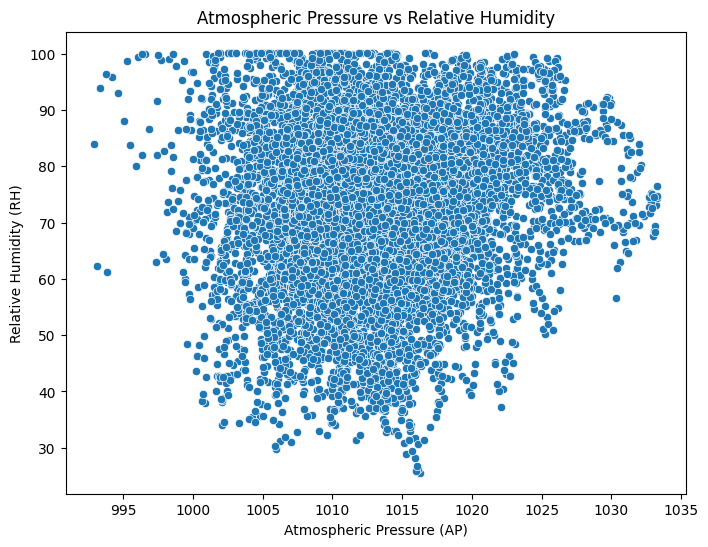

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='AP', y='RH')
plt.title('Atmospheric Pressure vs Relative Humidity')
plt.xlabel('Atmospheric Pressure (AP)')
plt.ylabel('Relative Humidity (RH)')
plt.show()

### 2. Distribution of Power Consumption (PE)
The distribution of power consumption (PE) can reveal whether it's skewed or normally distributed. 

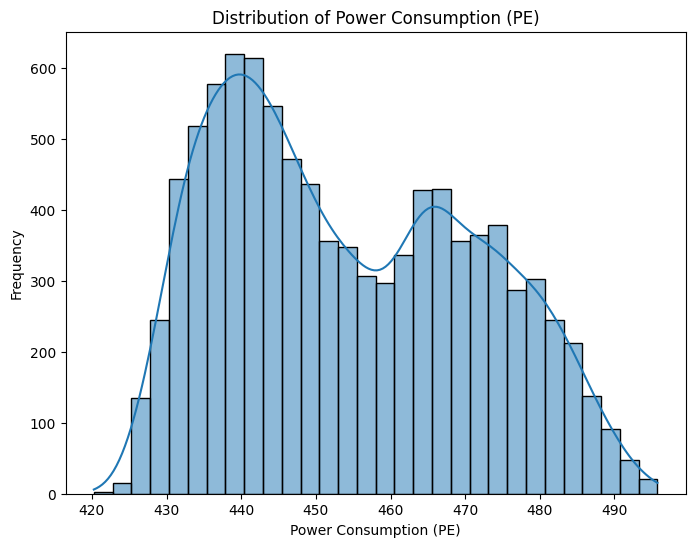

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df['PE'], kde=True, bins=30)
plt.title('Distribution of Power Consumption (PE)')
plt.xlabel('Power Consumption (PE)')
plt.ylabel('Frequency')
plt.show()

### 3. Power Consumption (PE) vs Temperature (AT)
Analyzing the relationship between temperature (AT) and power consumption (PE) could reveal patterns, such as higher power consumption during extreme temperatures

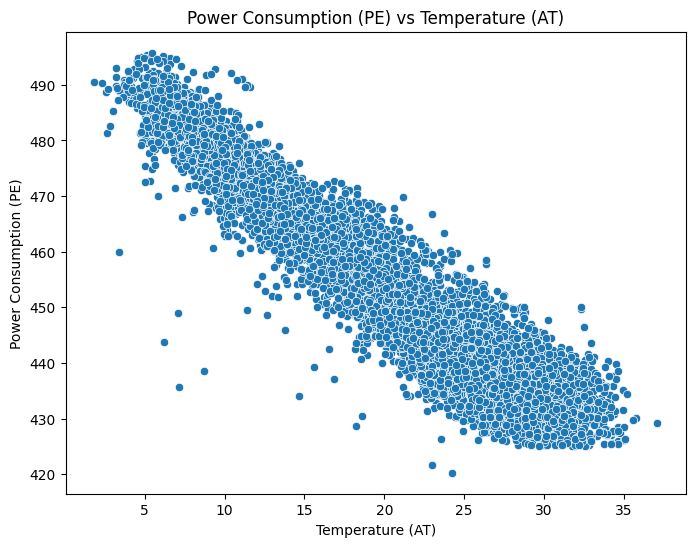

In [11]:
# Rename columns for consistency
df.rename(columns={'AT': 'Temperature', 'PE': 'PowerConsumption'}, inplace=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Temperature', y='PowerConsumption')
plt.title('Power Consumption (PE) vs Temperature (AT)')
plt.xlabel('Temperature (AT)')
plt.ylabel('Power Consumption (PE)')
plt.show()


#### Correlation Matrix to Find Relationships Between Variables
A correlation matrix can help identify strong linear relationships between the features. 

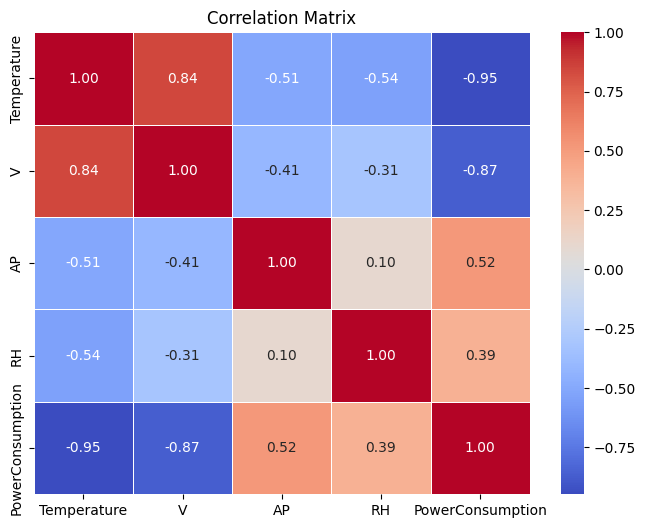

In [12]:
plt.figure(figsize=(8, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Rename 'RH' to 'Humidity' for consistency
df.rename(columns={'RH': 'Humidity'}, inplace=True)

# Keep only Temperature, Humidity, and Power Output
df = df[['Temperature', 'Humidity', 'PowerConsumption']]
print(df.head())


   Temperature  Humidity  PowerConsumption
0         8.34     90.01            480.48
1        23.64     74.20            445.75
2        29.74     41.91            438.76
3        19.07     76.79            453.09
4        11.80     97.20            464.43


In [14]:
# Define target variable (y)
y = df['PowerConsumption']

# Remove outliers (using robustscaler  method)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(df[['Temperature', 'Humidity']])
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:

# Define independent variables (X) and target variable (y)
X = df[['Temperature', 'Humidity']]
y = df['PowerConsumption']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


A high correlation between independent variables (Temperature & Humidity) can cause multicollinearity issues.
we can check Variance Inflation Factor (VIF) and remove highly correlated features.

In [16]:
# Add constant for VIF calculation
X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i+1) for i in range(len(X.columns))]
print(vif_data)

       Feature       VIF
0  Temperature  1.417121
1     Humidity  1.417121


A VIF > 5 suggests multicollinearity so there is no multicolinearity

In [17]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")  # Corresponds to Temperature and Humidity


Intercept: 516.5129958218963
Coefficients: [-2.38922265 -0.20638815]


In [18]:
# Predict power consumption on test data
y_pred = model.predict(X_test)

# Compare actual vs predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())


      Actual   Predicted
2513  433.27  433.716723
9411  438.16  439.130214
8745  458.42  459.346281
9085  480.82  475.835476
4950  441.41  435.119074


R² Score and Mean Absolute Error (MAE) to check the model's accuracy.

In [19]:
# Calculate R² Score and MAE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")


R² Score: 0.9237148842536314
Mean Absolute Error: 3.709926155709864


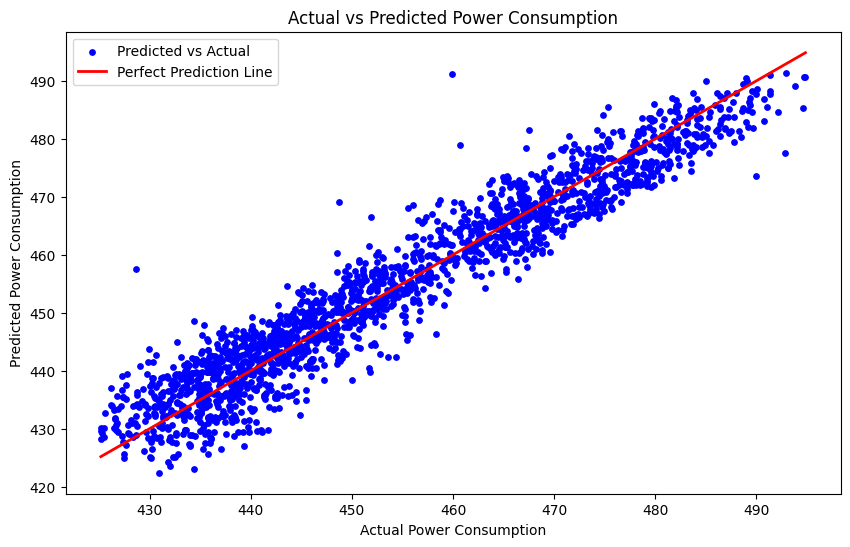

In [20]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', s=15)

# Plot a reference line (y = x), which shows the ideal case where actual = predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction Line')

plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.title('Actual vs Predicted Power Consumption')
plt.legend()
plt.show()
